In [1]:
#=======================================
# Imports
#=======================================
import numpy as np
import matplotlib.pyplot as plt
import glob
import xarray
import datetime
import calendar
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import matplotlib
import pickle
import pandas as pd
import os
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.interpolate import NearestNDInterpolator as nn
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
#import palettable
#import h5py
import scipy
import random
#from matplotlib import rc

# Read in dictionaries (as "pickle" files) of time-height soundings for each of the 9 simulations from the manuscript
## Dictionaries were created by stitching together time-height series at 1-min output for each initial and restart file(s) for a given simulation
## Relevant data used for analysis was extracted, but only that for cloud droplet number concentration (Nc) is used here
## These files are available in NetCDF format on the NCCS data portal (https://portal.nccs.nasa.gov/datashare/giss-camp2ex/)

In [4]:
sim_name_1 = 'dharma_cntl'
sim_name_2 = 'dharma_fixed_aero'
sim_name_3 = 'dharma_kk'
sim_name_4 = 'dharma_no_cc'
sim_name_5 = 'dharma_fixed_aero_no_cc'
sim_name_6 = 'dharma_2x'
sim_name_7 = 'bin'
sim_name_8 = 'bin_turb'
sim_name_9 = 'bin_turb_10x'
sims = [sim_name_1,sim_name_2,sim_name_3,sim_name_4,sim_name_5,sim_name_6,sim_name_7,sim_name_8,sim_name_9]
print(sims)

['dharma_cntl', 'dharma_fixed_aero', 'dharma_kk', 'dharma_no_cc', 'dharma_fixed_aero_no_cc', 'dharma_2x', 'bin', 'bin_turb', 'bin_turb_10x']


In [5]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/dharma_mean_sounding_time_height_profiles/'
#path = '/discover/nobackup/mwstanfo/dharma_post/soundings/'

# Initialize dictionaries
all_sims_sounding_dict = {}

for sim in sims:
    tmp_sounding_dict = pickle.load(open(path+sim+'_sounding_dict.p','rb'))
    all_sims_sounding_dict[sim] = tmp_sounding_dict    

# Plot time-height series of "nc_cld" variable, which the domain-mean in-cloud cloud droplet number concentration, and time series of domain-mean rain water path (RWP)
## Creates Fig. 6 of the manuscript

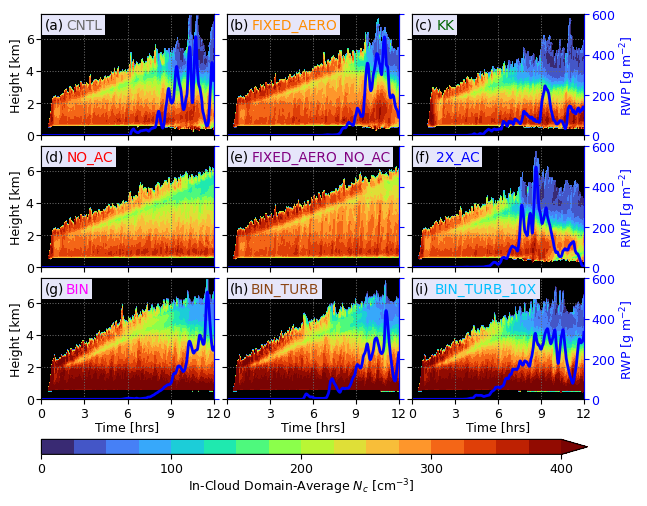

In [6]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(7,5))
axes_flat = np.ndarray.flatten(axes)

# Get Height from a single simulation
zt = all_sims_sounding_dict['bin']['zt']
zw = all_sims_sounding_dict['bin']['zw']

Fontsize=9

for ax in axes_flat:
    ax.grid(ls='dotted',lw=0.75,c='dimgrey')
    ax.tick_params(labelsize=Fontsize)
    ax.set_ylim(0,7.5)

color1='dimgrey' # CNTL--black will be used for observations
color2='darkorange'
color3='darkgreen'
color4='red'
color5='purple'
color6='blue'
color7='magenta'
color8='saddlebrown'
color9='deepskyblue'

colors = [color1,color2,color3,color4,color5,color6,color7,color8,color9]
labels = ['CNTL','FIXED_AERO','KK','NO_AC','FIXED_AERO_NO_AC','2X_AC','BIN','BIN_TURB','BIN_TURB_10X']
nc_levs = np.arange(0,425,25)
#cmap = 'inferno'
cmap='turbo'
color2='blue'
twin_ax_arr = []
dumi=0
for sim in sims:
    
    tmp_time = all_sims_sounding_dict[sim]['time']/3600.
    tmp_nc = all_sims_sounding_dict[sim]['nc_cld']
    #tmp_nc = all_sims_sounding_dict[sim]['nd_cld']
    tmp_clwc = all_sims_sounding_dict[sim]['clwc']
    tmp_rwc = all_sims_sounding_dict[sim]['rwc']
    tmp_rwp = all_sims_sounding_dict[sim]['rwp']
    tmp_avg_precip = all_sims_sounding_dict[sim]['avg_precip']
    tmp_max_precip = all_sims_sounding_dict[sim]['max_precip']
    tmp_nc[tmp_nc == 0.] = -999.

    nc_plot = axes_flat[dumi].contourf(tmp_time,zt*1.e-3,tmp_nc.T,levels=nc_levs,cmap=cmap,extend='max')
    dum_ticks = np.arange(0,700,100)
    
    tmp_ax = axes_flat[dumi].twinx()
    tmp_ax.plot(tmp_time,tmp_rwp,lw=2,c=color2)
    tmp_ax.set_ylim(0,600)
    twin_ax_arr.append(tmp_ax)
    tmp_ax.spines['right'].set_color(color2)
    tmp_ax.set_yticks([0,200,400,600])
    tmp_ax.set_yticklabels([])
    tmp_ax.tick_params(axis='y', colors=color2,labelsize=Fontsize)

    dumi+=1

for ax in axes_flat:
    ax.set_yticks([0,2,4,6])
    ax.set_yticklabels([])
    ax.set_xticks([0,3,6,9,12])
    ax.set_xticklabels([])
    
axes[0,0].set_yticklabels([0,2,4,6],fontsize=Fontsize)
axes[0,0].set_ylabel('Height [km]',fontsize=Fontsize)
axes[1,0].set_yticklabels([0,2,4,6],fontsize=Fontsize)
axes[1,0].set_ylabel('Height [km]',fontsize=Fontsize)
axes[2,0].set_yticklabels([0,2,4,6],fontsize=Fontsize)
axes[2,0].set_ylabel('Height [km]',fontsize=Fontsize)

axes[2,0].set_xticklabels([0,3,6,9,12])
axes[2,1].set_xticklabels([0,3,6,9,12])
axes[2,2].set_xticklabels([0,3,6,9,12])
axes[2,0].set_xlabel('Time [hrs]',fontsize=Fontsize)
axes[2,1].set_xlabel('Time [hrs]',fontsize=Fontsize)
axes[2,2].set_xlabel('Time [hrs]',fontsize=Fontsize)

bbox=dict(facecolor='lavender', edgecolor='none', boxstyle='square,pad=0.2',alpha=1)

dum_labs = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']

dumi=0
for ax in axes_flat:
    ax.text(0.02,0.97,dum_labs[dumi],transform=ax.transAxes,fontsize=Fontsize*1.1,va='top',ha='left',bbox=bbox)
    dumi+=1
    
axes_flat[0].text(0.145,0.97,labels[0],c=colors[0],fontsize=Fontsize*1.1,transform=axes_flat[0].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[1].text(0.145,0.97,labels[1],c=colors[1],fontsize=Fontsize*1.1,transform=axes_flat[1].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[2].text(0.145,0.97,labels[2],c=colors[2],fontsize=Fontsize*1.1,transform=axes_flat[2].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[3].text(0.145,0.97,labels[3],c=colors[3],fontsize=Fontsize*1.1,transform=axes_flat[3].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[4].text(0.145,0.97,labels[4],c=colors[4],fontsize=Fontsize*1.1,transform=axes_flat[4].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[5].text(0.14,0.97,labels[5],c=colors[5],fontsize=Fontsize*1.1,transform=axes_flat[5].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[6].text(0.14,0.97,labels[6],c=colors[6],fontsize=Fontsize*1.1,transform=axes_flat[6].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[7].text(0.14,0.97,labels[7],c=colors[7],fontsize=Fontsize*1.1,transform=axes_flat[7].transAxes,va='top',ha='left',bbox=bbox)
axes_flat[8].text(0.135,0.97,labels[8],c=colors[8],fontsize=Fontsize*1.1,transform=axes_flat[8].transAxes,va='top',ha='left',bbox=bbox)
    
    
      
twin_ax_arr[2].set_yticklabels([0,200,400,600],fontsize=Fontsize,color=color2)
twin_ax_arr[2].set_ylabel('RWP [g m$^{-2}$]',fontsize=Fontsize,c=color2)
twin_ax_arr[5].set_yticklabels([0,200,400,600],fontsize=Fontsize,color=color2)
twin_ax_arr[5].set_ylabel('RWP [g m$^{-2}$]',fontsize=Fontsize,c=color2)
twin_ax_arr[-1].set_yticklabels([0,200,400,600],fontsize=Fontsize,color=color2)
twin_ax_arr[-1].set_ylabel('RWP [g m$^{-2}$]',fontsize=Fontsize,c=color2)

cbar_ax = fig.add_axes([0.125,0, 0.78, 0.03])
cbar = fig.colorbar(nc_plot, cax=cbar_ax,ticks=np.arange(0,500,100),orientation='horizontal')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_xlabel('In-Cloud Domain-Average $N_{c}$ [cm$^{-3}$]',fontsize=Fontsize)
cbar.ax.xaxis.labelpad=1

plt.subplots_adjust(hspace=0.09,wspace=0.075)

for ax in axes_flat:
    #ax.set_facecolor('lightgrey')
    ax.set_facecolor('black')
    
for ax in axes_flat:
    ax.tick_params(pad=2)
    ax.xaxis.labelpad = 0
    ax.yaxis.labelpad = 2
    
for ax in twin_ax_arr:
    ax.tick_params(pad=2)
    ax.yaxis.labelpad = 2
    
fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_system_evolution.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  